In [1]:
from  visualize import plot_history_GNN1, plot_history_GNN3, plot_history_GNN2
from pathlib import Path
import re


In [3]:
dirpath = Path('.') / 'GNN1/experiments/GNN1_charged/eval_history.csv'
plot_history_GNN1(dirpath)

TypeError: expected string or bytes-like object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


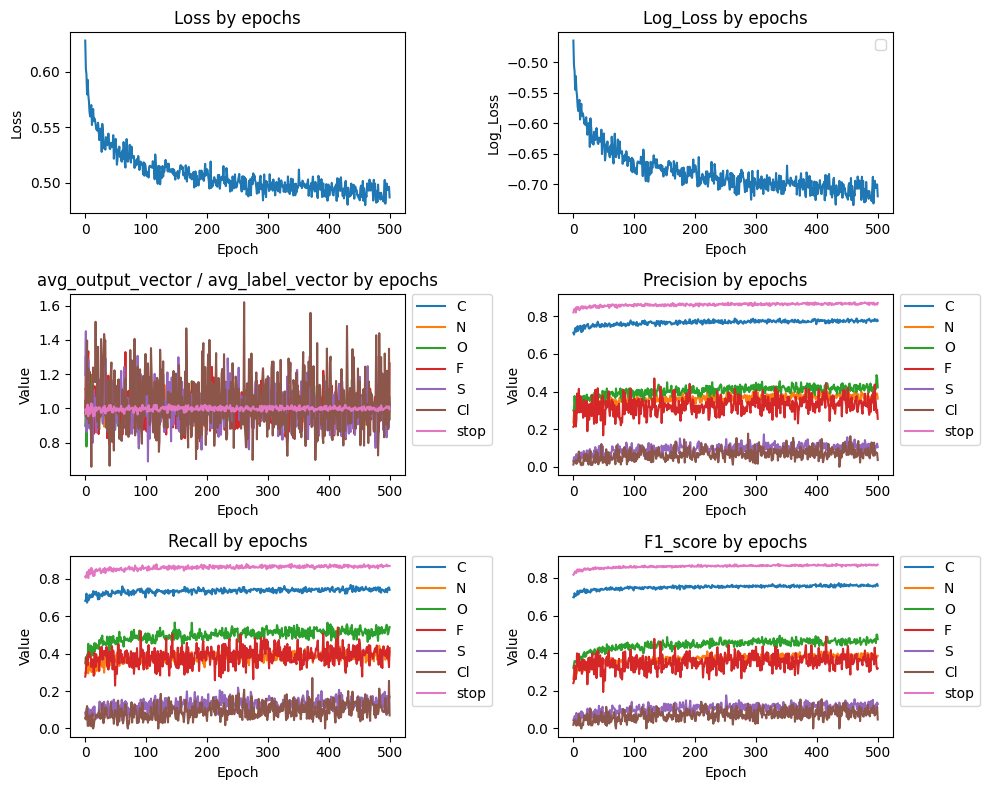

In [3]:
dirpath = Path('.') / 'GNN1/experiments/GNN1_500_big_512_size/eval_history.csv'
plot_history_GNN1(dirpath)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


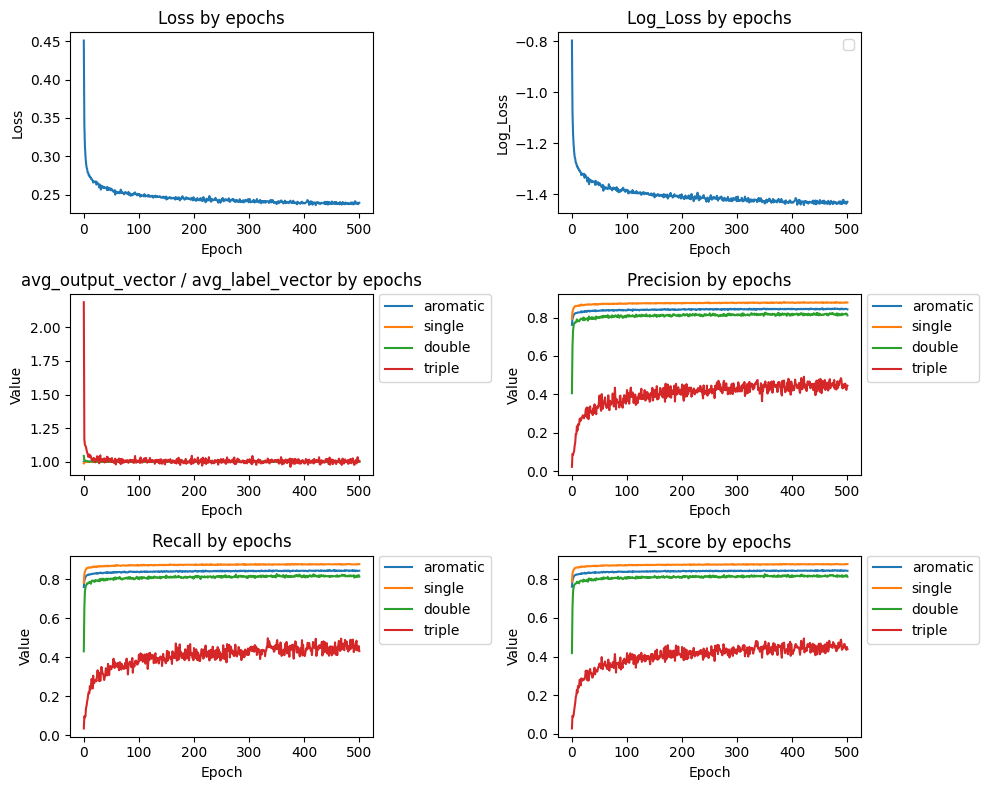

In [4]:
dirpath = Path('.') / 'GNN2/experiments/GNN2_500_big/training_history.csv'
plot_history_GNN2(dirpath)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


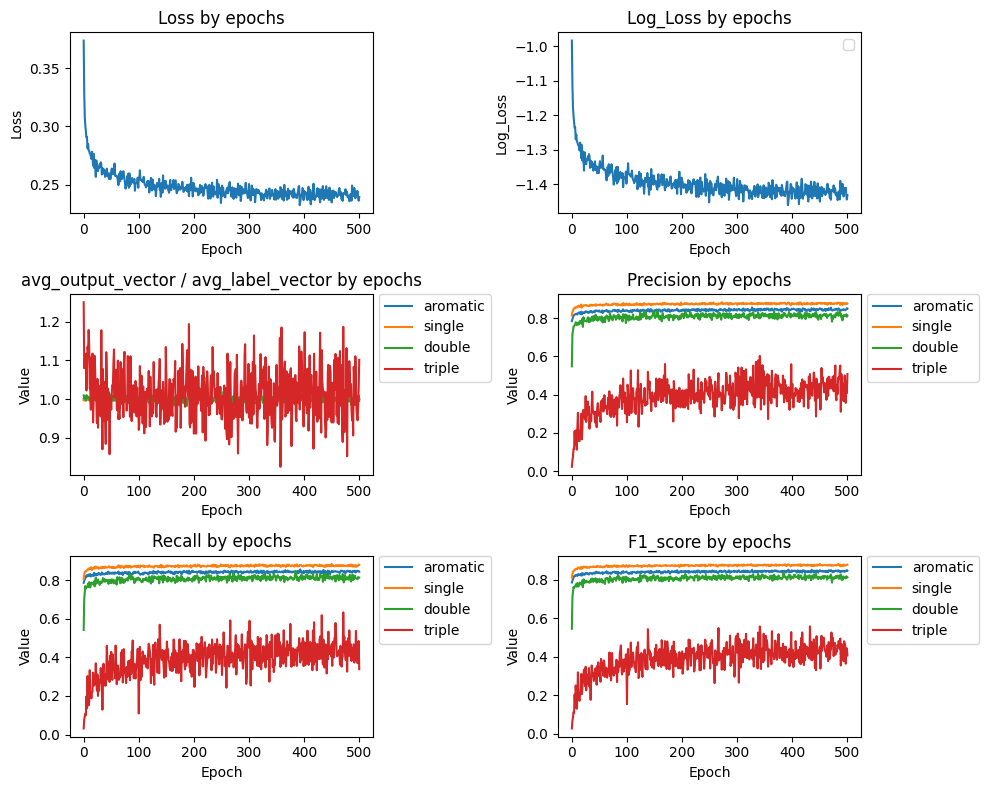

In [5]:
dirpath = Path('.') / 'GNN2/experiments/GNN2_500_big/eval_history.csv'
plot_history_GNN2(dirpath)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

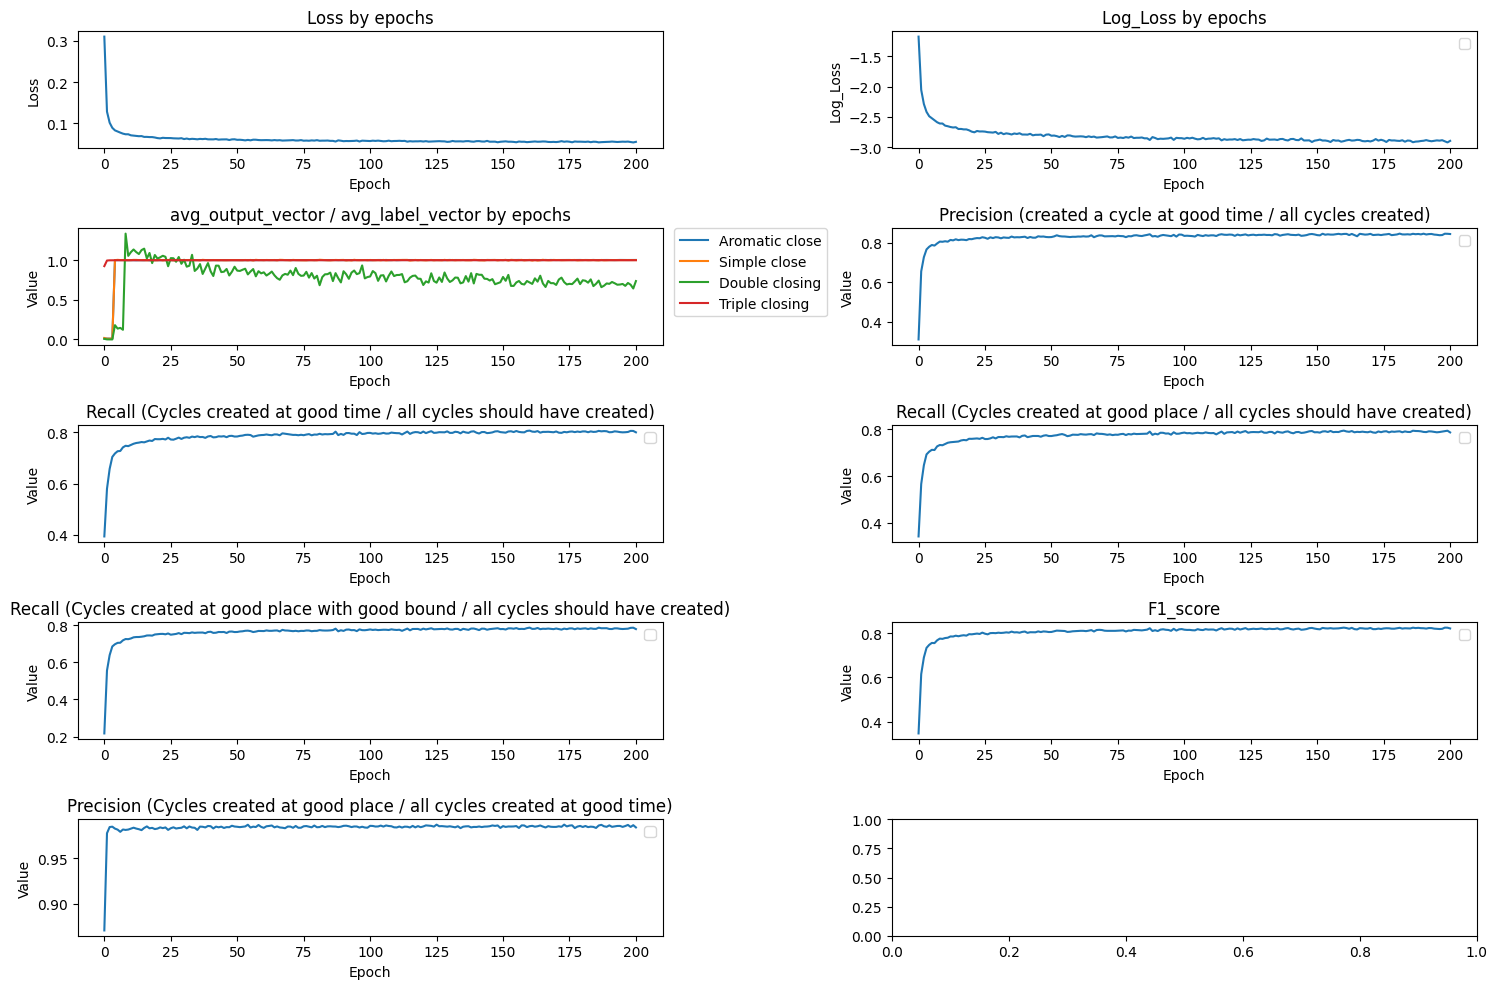

In [6]:
dirpath = Path('.') / 'GNN3' / 'experiments' / 'Long_Gnn_big_size' / 'training_history.csv'
plot_history_GNN3(dirpath)